In [68]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [62]:
df =pd.read_csv('Data_Covid.csv', index_col="ID")
df.head()

,Country,Total Case,New Case,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Case,Serious,Tot Case,Deaths 1M,Totals Tests,Tests 1M,Population
ID,,,,,,,,,,,,,,
1,USA,"105,441,949",NaN,"1,147,217",NaN,"102,974,679",NaN,NaN,"2,567","314,935","3,427","1,167,935,950","3,488,404","334,805,269"
2,India,"44,688,693",NaN,"530,775",NaN,"44,154,842",NaN,NaN,NaN,"31,770",377,"919,314,929","653,558","1,406,631,776"
3,France,"39,639,112",NaN,"165,073",NaN,"39,409,374","+3,972","+3,972",869,"604,397","2,517","271,490,188","4,139,547","65,584,518"
4,Germany,"38,231,610",NaN,"168,709",NaN,"37,806,500","+18,300","+18,300",NaN,"455,770","2,011","122,332,384","1,458,359","83,883,596"
5,Brazil,"37,076,053",NaN,"699,276",NaN,"36,249,161",NaN,NaN,NaN,"172,164","3,247","63,776,166","296,146","215,353,593"


In [63]:
_data = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'Duplicated' :df.duplicated().sum(),
    'NaN':df.isna().sum(),
    'Type':df.dtypes.values
})
_data

,Unique,Null,NullPercent,Duplicated,NaN,Type
Country,231,0,0.000000,0,0,object
Total Case,231,0,0.000000,0,0,object
New Case,23,208,0.900433,0,208,object
Total Deaths,213,6,0.025974,0,6,object
New Deaths,11,218,0.943723,0,218,float64
Total Recovered,210,21,0.090909,0,21,object
New Recovered,32,198,0.857143,0,198,object
Active Case,32,198,0.857143,0,198,object
Serious,66,104,0.450216,0,104,object
Tot Case,228,2,0.008658,0,2,object


##### Chuyển các attributes kiểu dữ liệu object sang float để thuận tiện tính toán 

In [64]:
def str_to_float1(df,feature):
    for i in feature:
        df[i] = df[i].str.replace(',', '').astype(float)

In [65]:
feature_ =["Total Case","New Case", "Total Deaths", "Total Recovered","New Recovered", "Active Case","Serious","Tot Case","Deaths 1M", "Totals Tests","Tests 1M","Population"]

In [66]:
str_to_float1(df,feature_)

In [80]:
df.head()

,Country,Total Case,New Case,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Case,Serious,Tot Case,Deaths 1M,Totals Tests,Tests 1M,Population
ID,,,,,,,,,,,,,,
1,USA,105441949.0,NaN,1147217.0,NaN,102974679.0,NaN,NaN,2567.0,314935.0,3427.0,1.167936e+09,3488404.0,3.348053e+08
2,India,44688693.0,NaN,530775.0,NaN,44154842.0,NaN,NaN,NaN,31770.0,377.0,9.193149e+08,653558.0,1.406632e+09
3,France,39639112.0,NaN,165073.0,NaN,39409374.0,3972.0,3972.0,869.0,604397.0,2517.0,2.714902e+08,4139547.0,6.558452e+07
4,Germany,38231610.0,NaN,168709.0,NaN,37806500.0,18300.0,18300.0,NaN,455770.0,2011.0,1.223324e+08,1458359.0,8.388360e+07
5,Brazil,37076053.0,NaN,699276.0,NaN,36249161.0,NaN,NaN,NaN,172164.0,3247.0,6.377617e+07,296146.0,2.153536e+08


In [59]:
_data = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'Duplicated' :df.duplicated().sum(),
    'NaN':df.isna().sum(),
    'Type':df.dtypes.values
})
_data

,Unique,Null,NullPercent,Duplicated,NaN,Type
Country,231,0,0.000000,0,0,object
Total Case,231,0,0.000000,0,0,float64
New Case,23,208,0.900433,0,208,float64
Total Deaths,213,6,0.025974,0,6,float64
New Deaths,11,218,0.943723,0,218,float64
Total Recovered,210,21,0.090909,0,21,float64
New Recovered,32,198,0.857143,0,198,float64
Active Case,32,198,0.857143,0,198,float64
Serious,66,104,0.450216,0,104,float64
Tot Case,228,2,0.008658,0,2,float64


##### Check sự tương quan của những thuộc tính

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2800\4278380896.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


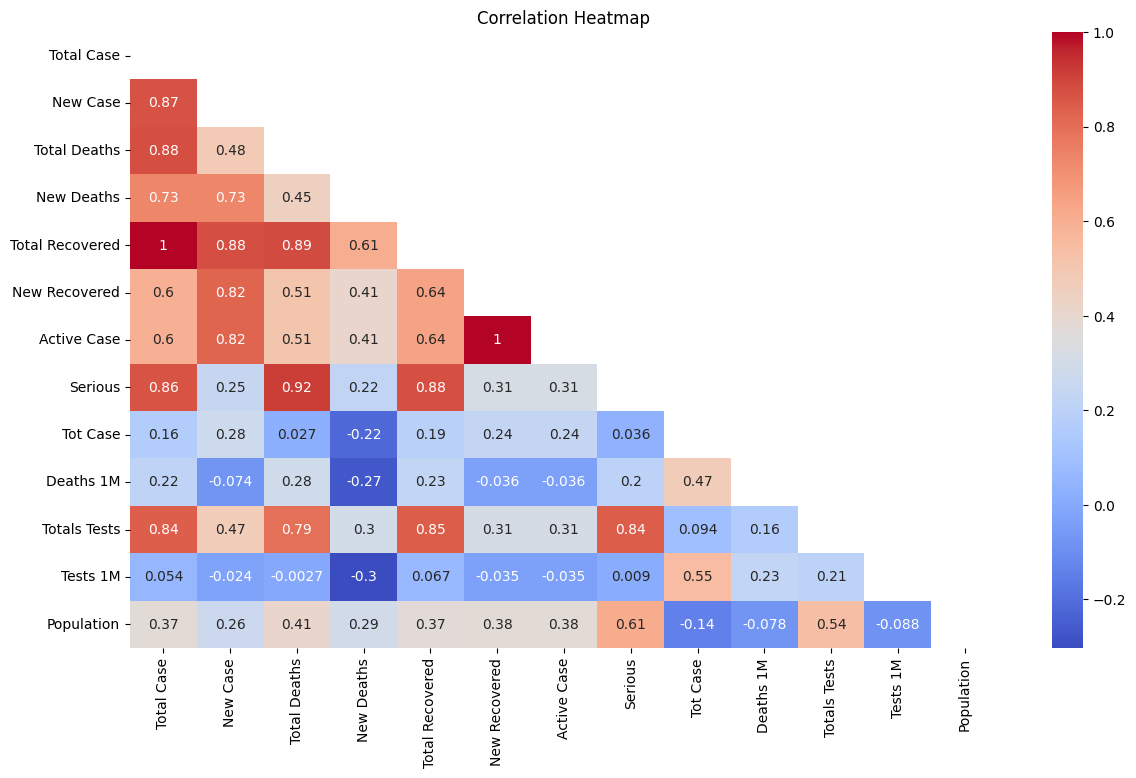

In [74]:
df_corr = df.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(14,8))
sns.heatmap(df_corr, cmap="coolwarm", annot=True, mask=mask)
plt.title("Correlation Heatmap")
plt.show()

##### Sự phân bố dữ liệu

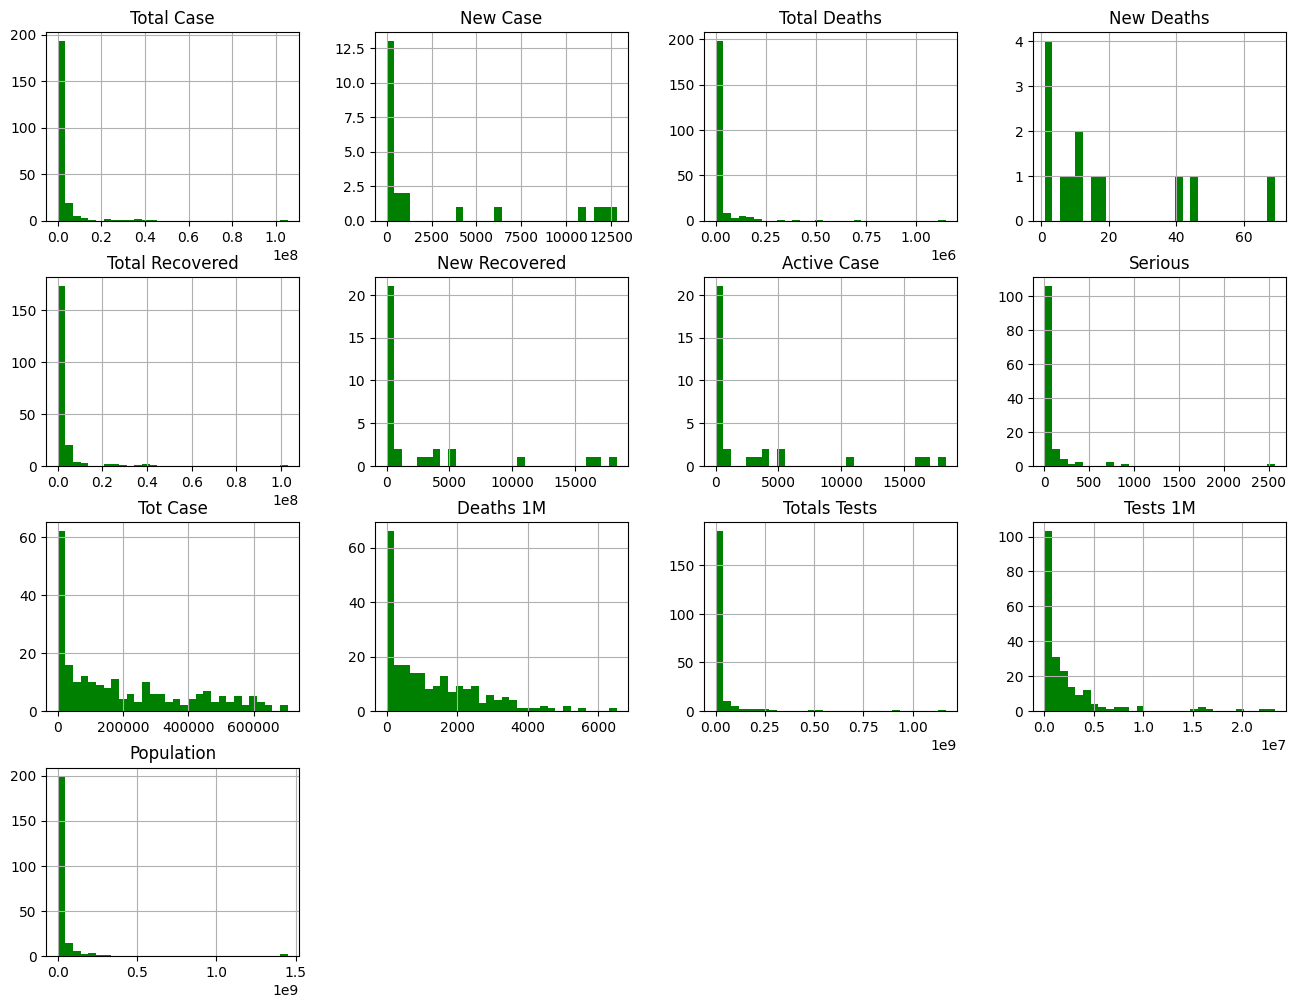

In [79]:
df.hist(bins= 30, color = 'green', figsize=(16,12));

##### Phân tích để hiểu rõ hơn về dữ liệu

1. Top 10 quốc gia mắc covid nhiều nhất.

In [89]:
temp= df[["Country", "Total Case"]]
top10 = temp.sort_values("Total Case", ascending= False)
top10[:10]


,Country,Total Case
ID,,
1,USA,105441949.0
2,India,44688693.0
3,France,39639112.0
4,Germany,38231610.0
5,Brazil,37076053.0
6,Japan,33288462.0
7,S. Korea,30594297.0
8,Italy,25603510.0
9,UK,24370154.0


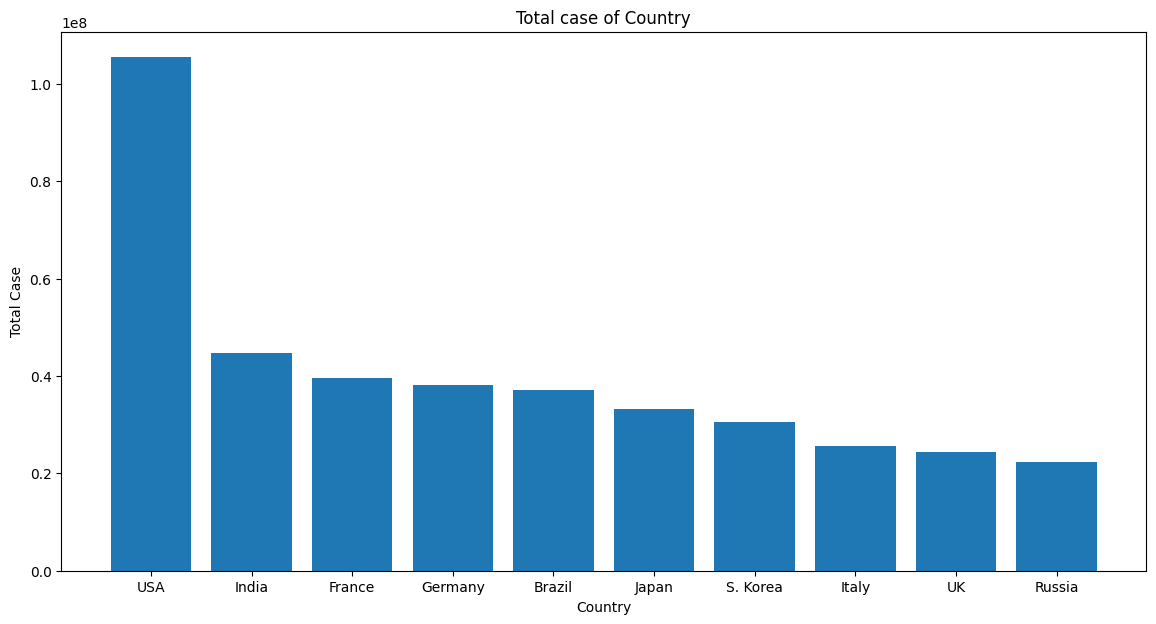

In [95]:
plt.figure(figsize=(14,7))
plt.bar(top10[:10]['Country'],top10[:10]['Total Case'])
plt.xlabel("Country")
plt.ylabel("Total Case")
plt.title("Total case of Country")
plt.show()

2. So sánh số lượng ca nhiễm mới và số ca chết ở thời điểm hiện tại (tại thời điểm thu thập dữ liệu 9/3/2023).

In [97]:
temp2 = df[["Country", "New Case","New Deaths"]]
temp2

,Country,New Case,New Deaths
ID,,,
1,USA,NaN,NaN
2,India,NaN,NaN
3,France,NaN,NaN
4,Germany,NaN,NaN
5,Brazil,NaN,NaN
...,...,...,...
227,Diamond Princess,NaN,NaN
228,Vatican City,NaN,NaN
229,Western Sahara,NaN,NaN


In [101]:
TotalNewCase= temp2["New Case"].sum()
TotalNewDeath = temp2['New Deaths'].sum()


In [108]:
content2 = pd.DataFrame({"New Case": TotalNewCase,
                         "New Deaths": TotalNewDeath}, index=["Total"])
content2

,New Case,New Deaths
Total,62325.0,232.0


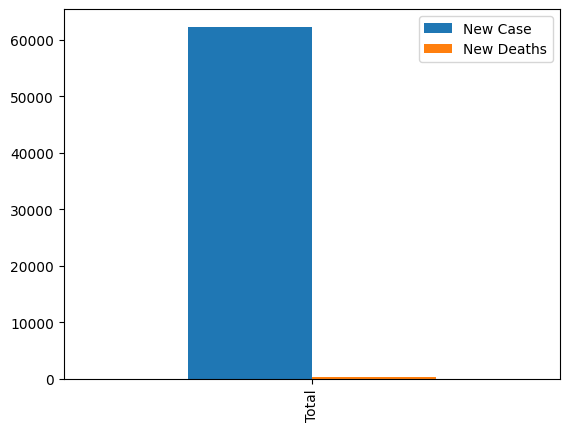

In [110]:
content2.plot(kind= 'bar');

Nhận xét: 
- Tổng số ca nhiễm mới cao
- Tổng số ca mất ít 

=> Cho thấy được sự phát triển của ngành y tế, có những biện pháp phòng chống,....

3. So sánh tổng số ca nhiễm, tổng số ca mất tới thời điểm hiện tại (9/3/2023)

In [112]:
temp3= df[["Total Case", "Total Deaths"]]
temp3 = pd.DataFrame({"Case": df["Total Case"].sum(),
                      "Death": df['Total Deaths'].sum()}, index=['Total'])
temp3

,Case,Death
Total,680944745.0,6807084.0


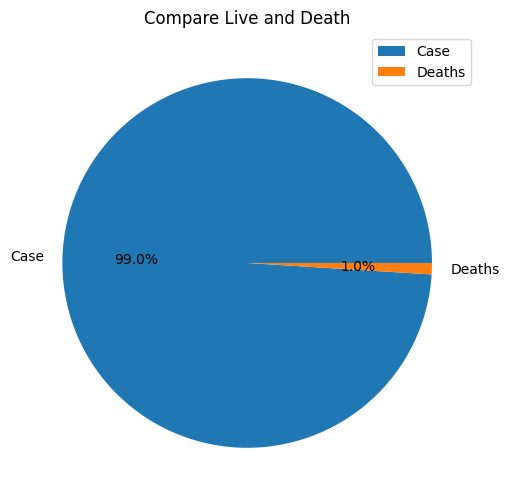

In [120]:
PercentCase= df["Total Case"].sum()/ df['Population'].sum()
PercentDeath= df["Total Deaths"].sum()/ df['Population'].sum()
percent =[PercentCase,PercentDeath]
labels = 'Case', 'Deaths'
sizes = percent
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Compare Live and Death")
plt.legend()
plt.show()